$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Rikard Olsson, 900713-0355, rikolss@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$      **and by: Sharan Sabi, 951207-7554, ssharan@student.chalmers.se**
<br />

General guidelines:
* Since there is no theoretical part for this assigment, submit this ipynb only (with completed code/results).
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above.
* All datasets can be downloaded from the course website.
* All plots/tables and other relevant information should be included.

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.


d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

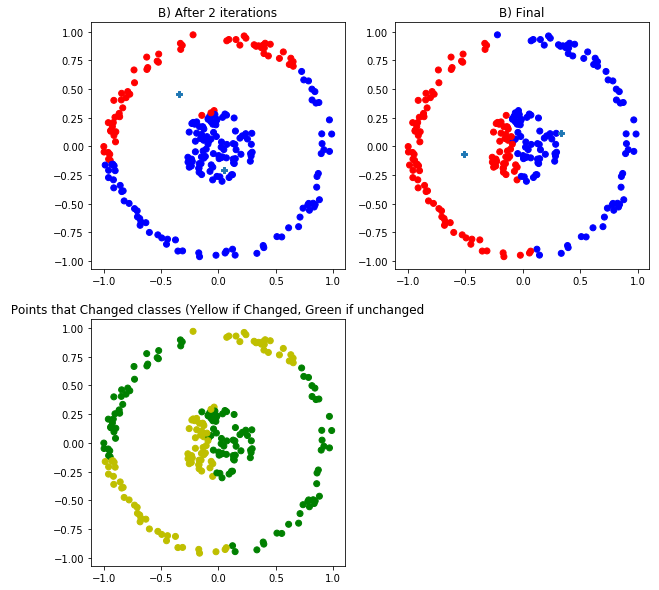

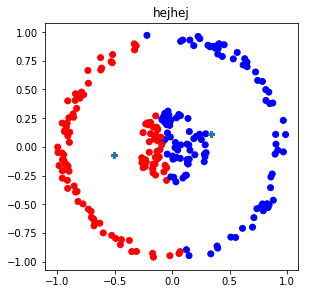

In [21]:
import scipy.io
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

mat = scipy.io.loadmat('hw5_p1a.mat')
X = mat['X']

ma = scipy.io.loadmat('hw5_p1b.mat')
Y = ma['X']

################################################## a) b) #############################################
class Linear_k_means:
    def __init__(self, X, K):
        self.X = X
        self.K = K
        
        # FOR B) store cluster assignments after 2 iterations and convergence
        self.iterations = 0
        self.clusters = []
    
    # Calculates new mu as given in lecture notes 
    def new_mu(self,z,k):
        numerator = np.zeros(2)
        for i in range(0,self.X.shape[0]):
            numerator += self.X[i] * z[k][i]

        d = 0
        for j in range(0,len(z[k])):
            d += z[k][j]

        return numerator / d

    def calculate(self):

        # Define z as the centriods for which the points are assigned to
        z = {}
        for i in range(0,self.K):
            z[i] = {}

        # Define mu as the centroids
        mu = []

        # Guess their centroids by taking a random point
        for i in range(0,self.K):
            index = int(round(np.random.uniform() * 10))
            mu.append(X[index])

        #centroid after 2 iteration
        mu_2 = []

        # Run until the mu's are not changed anymore
        while True:

            # Increament iterations
            self.iterations += 1

            # Create a deep copy of z to compare with if z has changed
            z_n = copy.deepcopy(z)
            mu_n = copy.deepcopy(mu)

            # Calculate the distance from every point to each mu's
            for i in range(0, self.X.shape[0]):
                p = self.X[i]

                # Define a m_short to indicate which mu that had shortest distance to point p
                mu_short = {
                   "dis": 99,
                   "index": -1
                }

                # Calculate which mu has shortest distance
                for m_i in range(0,len(mu)):
                    dis = np.linalg.norm(p-mu[m_i])
                    if dis < mu_short["dis"]:
                        mu_short["dis"] = dis
                        mu_short["index"] = m_i

                # Assign the point to the closest mu
                z[mu_short["index"]][i] = 1

                # Assign 0 to every other mu for this point 
                for k in range(0,self.K):
                    if not (mu_short["index"] == k):
                        z[k][i] = 0

            # Calculate new mu's
            for k in range(0,self.K):
                mu[k] = self.new_mu(z,k)

            # Check if z's or mu's are equal is different
            if np.array_equal(z, z_n) or np.array_equal(mu, mu_n):
                break

            # FOR B) store clusters (z)
            if self.iterations == 2:
                self.clusters.append(z_n)
                mu_2 = copy.deepcopy(mu)

        # FOR B) store clusters at convergence
        self.clusters.append(z)
        
        # Append all vars to plot
        self.mu = mu
        self.z = z
        self.mu_2 = mu_2

        # We're done, return the clusters
        return self.clusters
    
    def plot_as_requested(self):
        # Plot when 2 iterations
        fig = plt.figure(figsize=(10,10))
        ax1 = fig.add_subplot(221)
        ax1.set_title("B) After 2 iterations")
        colors_1 = []
        for i in range(0, len(self.clusters[0][0])):
            if self.clusters[0][0][i] == 1:
                colors_1.append("r")
            else:
                colors_1.append("b")
        ax1.scatter(self.X[:,0],self.X[:,1],color=colors_1)
        ax1.scatter([i[0] for i in self.mu_2], [i[1] for i in self.mu_2], marker = "P")

        # Plot when convergence reached
        ax2 = fig.add_subplot(222)
        ax2.set_title("B) Final")
        colors_2 = []
        for i in range(0, len(self.clusters[1][0])):
            if self.clusters[1][0][i] == 1:
                colors_2.append("r")
            else:
                colors_2.append("b")
        ax2.scatter(self.X[:,0],self.X[:,1],color=colors_2)
        ax2.scatter([i[0] for i in self.mu], [i[1] for i in self.mu], marker = "P")

        # plot to see the difference between after 2 iterations and after convergence

        ax4 = fig.add_subplot(223)
        ax4.set_title(" Points that Changed classes (Yellow if Changed, Green if unchanged ")
        colors_3 = []
        for i in range(0, len(self.clusters[1][0])):
            if ((self.clusters[0][0][i] == 1) and (self.clusters [1][0][i] == 0)) or ((self.clusters[0][1][i] == 1) and (self.clusters [1][1][i] == 0)):
                colors_3.append("y")
            else:
                colors_3.append("g")

        ax4.scatter(self.X[:,0],self.X[:,1],color=colors_3)
    
    # Plots the current state
    def plot(self, title):
        fig = plt.figure(figsize=(10,10))
        ax2 = fig.add_subplot(222)
        ax2.set_title(title)
        colors_2 = []
        for i in range(0, len(self.clusters[1][0])):
            if self.clusters[1][0][i] == 1:
                colors_2.append("r")
            else:
                colors_2.append("b")
        ax2.scatter(self.X[:,0],self.X[:,1],color=colors_2)
        ax2.scatter([i[0] for i in self.mu], [i[1] for i in self.mu], marker = "P")

k_means = Linear_k_means(Y,2)
_ = k_means.calculate()
k_means.plot_as_requested()
# Show the plots
plt.show()
    

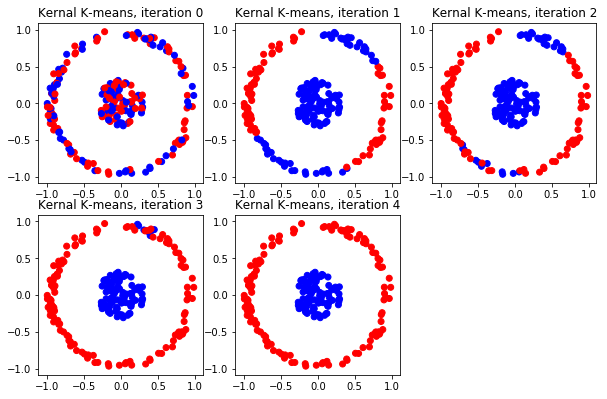

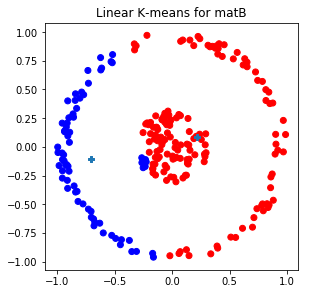

In [22]:
################################################## c) #############################################
mat = scipy.io.loadmat('hw5_p1b.mat')
Y = mat['X']

# This keeps track of all computations of the kernel. The "array" property is the matrix of all k(x_i, x_j), for all i,j in N.
# The "dict" property maps a single point to a row vector in the matrix
class Comp:
    def init_array(self, typ, data, sigma):
        # Assume array is undefined
        array = []
        if typ == "rbf":
            array = rbf_kernel(data, data, 1/(2*sigma**2))
        elif typ == "linear":
            for i in range(0,data.shape[0]):
                array.append([])
                for j in range(0, data.shape[0]):
                    array[i].append(np.linalg.norm(data[i]-data[j]))

            array = np.array(array).T
        else:
            raise Exception("No Computation type given")

        return array

    def hash(self, x):
        return hash(str(x[0])+str(x[1]))

    def get(self, x):
        return self.dict[self.hash(x)]

    def __init__(self, typ, data, sigma = 1):
        self.array = self.init_array(typ,data,sigma)

        self.dict = {}
        for i in range(0,data.shape[0]):
            x = data[i]
            self.dict[self.hash(x)] = self.array[i]

# Creates and shows k klusters for given data if converge on calculate()
class Kernal_k_means:

    def __init__(self, typ, data, K, sigma = 0):
        # Computes and stores computations of kernel
        self.comp = Comp(typ,data,sigma)
        
        self.data = data
        self.K = K
        self.n = data.shape[0]
        self.clusters = {}
        self.iterations = 0
        self.plots = 1

        self.z = self.initZ()
        self.fig = plt.figure(figsize=(10, 10))

    # Create's K number of dictionaries to map the points
    def initZ(self):
        # Define z as the centriods for which the points are assigned to
        z = []
        for k in range(0, self.K):
            z.append([])
            # Assign random points to z_nk
            for _ in range(0, self.n):
                if np.random.uniform() > 0.5:
                    z[k].append(1)
                else:
                    z[k].append(0)
        return np.array(z)

    # Second term of the distance function defined in lecture notes
    def snd_term(self, x, k):

        res = np.dot(self.z[k], self.comp.get(x))

        return (2*res) / self.Nk(k)

    # Third term of the distance function defined in lecture notes
    def td_term(self, k):

        # Create a 2D matrix of z_mk and z_lk. The same as taking z_k * z_k^T
        zk = np.outer(self.z[k], self.z[k])

        return np.sum(zk * self.comp.array) / (self.Nk(k)**2)

    # Sum of number of points assigned to the k'th z
    def Nk(self,k):
        return np.sum(self.z[k])

    # Distance function as defined in lecture notes
    def distance(self, x, k):
        stm = self.snd_term(x, k)
        ttm = self.td_term(k)
        return 1 - stm + ttm
    
    # Plot the current state
    def plot(self,title):
        # Plot when convergence reached
        ax = self.fig.add_subplot(222)
        ax.set_title(title)
        colors = []
        for i in range(0, self.n):
            if self.z[0][i] == 1:
                colors.append("r")
            else:
                colors.append("b")
        ax.scatter(self.data[:, 0], self.data[:, 1], color=colors)
    
    # Works only for k=2
    def plot_each(self):
        if not self.K == 2:
            return

        # Plot when convergence reached
        ax = self.fig.add_subplot(3, 3, self.plots)
        ax.set_title("Kernal K-means, iteration " + str(self.iterations))
        colors = []
        for i in range(0, self.n):
            if self.z[0][i] == 1:
                colors.append("r")
            else:
                colors.append("b")
        ax.scatter(self.data[:, 0], self.data[:, 1], color=colors)
        self.plots += 1

    def calculate(self, plot_each = False):

        # Plot when idle
        if plot_each:
            self.plot_each()

        # Compute until nothing changes anymore
        while (True):

            # Increase number of iterations
            self.iterations += 1

            # Define a z to compare with
            z_n = copy.deepcopy(self.z)

            # Save the current z for this iteration
            self.clusters[self.iterations] = z_n

            # For every point in data, store the shortest distance 
            for i in range(0,self.n):
                x = self.data[i]
                s = {"index": -1, "dis": 999999} # Just need a big number here
                for k in range(0, self.K):
                    d = self.distance(x,k)
                    if d < s["dis"]:
                        s["dis"] = d
                        s["index"] = k
                
                self.z[s["index"]][i] = 1

                for l in range(0, self.K):
                    if not l == s["index"]:
                        self.z[l][i] = 0

            # Check if converge
            if np.array_equal(self.z, z_n):
                break

            # Plot this iteration
            if plot_each:
                self.plot()

        # Show plots if true
        if plot_each:
            plt.show()

        return self.z

km = Kernal_k_means("rbf",Y,2,0.2)
_ = km.calculate(False)
km.plot("Kernal K-means for matB")

lkm = Linear_k_means(Y,2)
_ = lkm.calculate()
lkm.plot("Linear K-means for matB")
